In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read & Show dataset
df = pd.read_csv("/kaggle/input/salary-data-gender/Salary_Data_Gender.csv")

cols = df.columns.tolist() # Automaticaly read columns names 

table = df.copy()
table.head() # Show the dataset

,YearsExperience,Salary,Gender
0,1.1,39343.0,0
1,1.3,46205.0,0
2,1.5,37731.0,1
3,2.0,43525.0,0
4,2.2,39891.0,1


In [3]:
# Features
X = df[["YearsExperience", "Gender"]]
y = df["Salary"]

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 2)
(6, 2)
(24,)
(6,)


In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [7]:
# modela
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
# model prediction and test
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")

MSE: 50825750.51
RMSE: 7129.22
R2 score: 0.90


In [10]:
# prediction for 15 years
X_new = pd.DataFrame({"YearsExperience": [15], "Gender": [0]})
X_new_scaled = scaler.transform(X_new.values)
predicted_salary_15y = model.predict(X_new_scaled)
print(f"Predicted salary for 15 years: {predicted_salary_15y[0]:.2f}")


Predicted salary for 15 years: 167278.41


In [11]:
mean_salary = df["Salary"].mean()
print(f"Mean-based prediction: {mean_salary:.2f}")
print(f"Difference from ML model: {abs(predicted_salary_15y[0] - mean_salary):.2f}")

Mean-based prediction: 76003.00
Difference from ML model: 91275.41


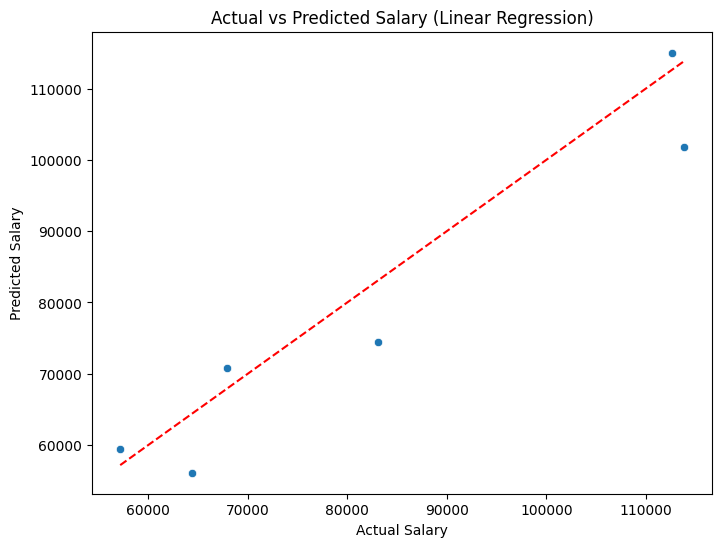

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()